<a href="https://www.kaggle.com/code/whitneyhollman/notebook-classicalcomposer-eras?scriptVersionId=168759027" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import tabulate as tabulate
import plotly.graph_objects as go
import plotly.express as px

Analysis of Classical Composers and the historical context of their largest compositions...

In [2]:
df_composers = pd.read_csv('/kaggle/input/top-classical-composers/classical_composers.csv',
                          encoding='ISO-8859-1')

DATA CLEAN: Classical Composers from Kaggle

In [3]:
df_composers.head()

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0
4,Richard Wagner,German,1813.0,1883.0,Der Ring des Nibelungen,NaN


In [4]:
df_composers = df_composers.drop(df_composers.index[0])
df_composers.head()

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0
4,Richard Wagner,German,1813.0,1883.0,Der Ring des Nibelungen,NaN
5,Joseph Haydn,Austrian,1732.0,1809.0,Symphony No. 45,25.0


In [5]:
df_composers = df_composers.drop(100)
df_composers

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0
4,Richard Wagner,German,1813.0,1883.0,Der Ring des Nibelungen,NaN
5,Joseph Haydn,Austrian,1732.0,1809.0,Symphony No. 45,25.0
...,...,...,...,...,...,...
95,Léonin,French,1135.0,1201.0,Magnus Liber Organi,NaN
96,Manuel de Falla,Spanish,1876.0,1946.0,"El amor brujo, Noches en los jardines de España",23.0
97,Hildegard von Bingen,German,1098.0,1179.0,"Ordo Virtutum, Symphony of the Harmony of Cele...",NaN
98,Mikhail Glinka,Russian,1804.0,1857.0,"A Life for the Tsar, Ruslan and Ludmila",NaN


EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
average_duration = df_composers['Duration of Biggest Piece(mins)'].mean()
average_duration

38.4375

In [7]:
# Fill the NaN values with the average duration 
df_composers.fillna({'Duration of Biggest Piece(mins)': 38.4}, inplace=True)

df_composers

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0
4,Richard Wagner,German,1813.0,1883.0,Der Ring des Nibelungen,38.4
5,Joseph Haydn,Austrian,1732.0,1809.0,Symphony No. 45,25.0
...,...,...,...,...,...,...
95,Léonin,French,1135.0,1201.0,Magnus Liber Organi,38.4
96,Manuel de Falla,Spanish,1876.0,1946.0,"El amor brujo, Noches en los jardines de España",23.0
97,Hildegard von Bingen,German,1098.0,1179.0,"Ordo Virtutum, Symphony of the Harmony of Cele...",38.4
98,Mikhail Glinka,Russian,1804.0,1857.0,"A Life for the Tsar, Ruslan and Ludmila",38.4


In [8]:
# First we will sort by composer and the duration of their biggest piece

df_composers.sort_values(by=['Composer', 'Duration of Biggest Piece(mins)'], ascending=[True, False])

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
29,Maurice Ravel,French,1875.0,1937.0,"Boléro, Daphnis et Chloé",15.0
50,Aaron Copland,American,1900.0,1990.0,"Appalachian Spring, Fanfare for the Common Man",25.0
71,Alban Berg,Austrian,1885.0,1935.0,"Wozzeck, Lulu",38.4
72,Alexander Borodin,Russian,1833.0,1887.0,"Prince Igor, Polovtsian Dances",11.0
99,Alexander Glazunov,Russian,1865.0,1936.0,"The Seasons, Symphony No. 5",35.0
...,...,...,...,...,...,...
94,Tomás Luis de Victoria,Spanish,1549.0,1611.0,"Requiem, O magnum mysterium",38.4
73,Vincenzo Bellini,Italian,1801.0,1835.0,"Norma, La Sonnambula",38.4
52,William Byrd,English,1539.0,1623.0,"Mass for Four Voices, Ave verum corpus",38.4
89,William Walton,English,1902.0,1983.0,"Belshazzar's Feast, Violin Concerto",35.0


In [9]:
# Group composer by duration

group = df_composers['Composer'].groupby(df_composers['Duration of Biggest Piece(mins)'])

group.head()

1         Ludwig van Beethoven
2     Wolfgang Amadeus Mozart 
3       Johann Sebastian Bach 
4               Richard Wagner
5                Joseph Haydn 
                ...           
90              Darius Milhaud
91             Orlando Gibbons
93               Samuel Barber
96             Manuel de Falla
99          Alexander Glazunov
Name: Composer, Length: 67, dtype: object

In [10]:
# What is the average duration of the biggest piece for composers who died in the same year?
grouped = df_composers['Died'].groupby(df_composers['Duration of Biggest Piece(mins)'])
grouped.mean()

Duration of Biggest Piece(mins)
4.0      1625.000000
7.0      1935.000000
8.0      1981.000000
10.0     1825.666667
11.0     1887.000000
15.0     1947.500000
17.0     1937.000000
20.0     1933.000000
22.0     1936.000000
23.0     1946.000000
24.0     1920.333333
25.0     1928.000000
26.0     1963.000000
28.0     1847.000000
30.0     1834.571429
31.0     1886.000000
32.0     1957.000000
33.0     1881.000000
35.0     1873.600000
38.0     1945.000000
38.4     1744.628571
40.0     1747.600000
45.0     1906.000000
50.0     1967.000000
54.0     1869.000000
60.0     1976.000000
64.0     1828.000000
65.0     1791.000000
75.0     1766.500000
80.0     1896.000000
125.0    1750.000000
135.0    1701.000000
Name: Died, dtype: float64

In [11]:
# Removed Composer Guillaume Dufay because his Nationality was one of two places and it was not clear which one was correct
df_composers = df_composers[df_composers['Composer'] != 'Guillaume Dufay']
df_composers

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0
4,Richard Wagner,German,1813.0,1883.0,Der Ring des Nibelungen,38.4
5,Joseph Haydn,Austrian,1732.0,1809.0,Symphony No. 45,25.0
...,...,...,...,...,...,...
95,Léonin,French,1135.0,1201.0,Magnus Liber Organi,38.4
96,Manuel de Falla,Spanish,1876.0,1946.0,"El amor brujo, Noches en los jardines de España",23.0
97,Hildegard von Bingen,German,1098.0,1179.0,"Ordo Virtutum, Symphony of the Harmony of Cele...",38.4
98,Mikhail Glinka,Russian,1804.0,1857.0,"A Life for the Tsar, Ruslan and Ludmila",38.4


In [12]:
print(df_composers.columns)

subset = df_composers[df_composers['Died'] - df_composers[' Born']>15].copy()

subset['AgeAtDeath'] = subset['Died' ]- subset[' Born']
subset

Index(['Composer', '  Nationality ', ' Born', 'Died', 'Biggest Piece',
       'Duration of Biggest Piece(mins)'],
      dtype='object')


,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins),AgeAtDeath
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0,21.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0,35.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0,65.0
4,Richard Wagner,German,1813.0,1883.0,Der Ring des Nibelungen,38.4,70.0
5,Joseph Haydn,Austrian,1732.0,1809.0,Symphony No. 45,25.0,77.0
...,...,...,...,...,...,...,...
95,Léonin,French,1135.0,1201.0,Magnus Liber Organi,38.4,66.0
96,Manuel de Falla,Spanish,1876.0,1946.0,"El amor brujo, Noches en los jardines de España",23.0,70.0
97,Hildegard von Bingen,German,1098.0,1179.0,"Ordo Virtutum, Symphony of the Harmony of Cele...",38.4,81.0
98,Mikhail Glinka,Russian,1804.0,1857.0,"A Life for the Tsar, Ruslan and Ludmila",38.4,53.0


In [13]:
subset_sorted = subset.sort_values(by='AgeAtDeath', ascending=True)
subset_sorted

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins),AgeAtDeath
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0,21.0
81,Giovanni Battista Pergolesi,Italian,1710.0,1736.0,"Stabat Mater, La serva padrona",40.0,26.0
7,Franz Schubert,Austrian,1797.0,1828.0,Symphony No. 9,64.0,31.0
73,Vincenzo Bellini,Italian,1801.0,1835.0,"Norma, La Sonnambula",38.4,34.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0,35.0
...,...,...,...,...,...,...,...
79,Heinrich Schütz,German,1585.0,1672.0,"Musikalische Exequien, Psalmen Davids",38.4,87.0
17,Giuseppe Verdi,Italian,1813.0,1901.0,"La Traviata, Rigoletto, Aida, Nabucco",38.4,88.0
10,Igor Stravinsky,Russian,1882.0,1971.0,The Rite of Spring,33.0,89.0
50,Aaron Copland,American,1900.0,1990.0,"Appalachian Spring, Fanfare for the Common Man",25.0,90.0


In [14]:
subset_sorted.columns = subset_sorted.columns.str.strip()
subset_sorted['AgeAtDeath'] = subset_sorted['Died' ]- subset_sorted['Born']

In [15]:
from tabulate import tabulate

average_age_at_death = subset_sorted.groupby('Nationality')['AgeAtDeath'].mean()
average_age_at_death

average_age_at_death_nationality_df = average_age_at_death.reset_index()

sorted_df = average_age_at_death_nationality_df.sort_values(by='AgeAtDeath', ascending=True)
print(tabulate(sorted_df, headers='keys', tablefmt='rst'))

====  ==============  ============
  ..  Nationality       AgeAtDeath
====  ==============  ============
  14  Polish               39
   1  Austrian             57.2
  12  Italian              60.0714
  15  Russian              60.9091
   8  Franco-Flemish       62
  13  Norweigen            64
  10  German               65.5882
   3  Czech                65.6667
  16  Spanish              66
   4  Danish               66
   5  English              66.2
   2  Belgian              68
   9  French               69.1765
  11  Hungarian            69.5
   0  American             72
   7  Flemish              81
   6  Finnish              92
====  ==============  ============


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


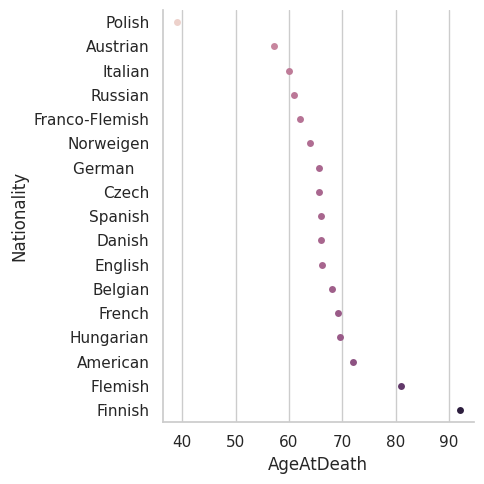

In [16]:
# Data visualization for age at death by nationality

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

sns.catplot(
    data = sorted_df, 
    x = 'AgeAtDeath', y='Nationality',
    hue='AgeAtDeath',
    kind="swarm"
)

In [17]:
# subset_sorted by nationality
for name, group in subset_sorted.groupby('Nationality'):
    print(f"Nationality : {name}")
    print(group[['Composer', 'AgeAtDeath']], "\n")

Nationality : American
            Composer  AgeAtDeath
63  George Gershwin         39.0
93     Samuel Barber        71.0
47     Charles Ives         80.0
80         John Cage        80.0
50     Aaron Copland        90.0 

Nationality : Austrian
                    Composer  AgeAtDeath
7            Franz Schubert         31.0
2   Wolfgang Amadeus Mozart         35.0
87                 Hugo Wolf        43.0
71               Alban Berg         50.0
18            Gustav Mahler         51.0
61              Anton Webern        62.0
25            Anton Bruckner        72.0
68         Johann Strauss II        74.0
5              Joseph Haydn         77.0
46         Arnold Schoenberg        77.0 

Nationality : Belgian
        Composer  AgeAtDeath
56  Cesar Franck        68.0 

Nationality : Czech
           Composer  AgeAtDeath
55  Bedrich Smetana        60.0
16   Antonin Dvorak        63.0
69     Leos Janacek        74.0 

Nationality : Danish
        Composer  AgeAtDeath
88  Carl Nielsen   

In [18]:
# Nationality of compower and time of death in ascending order
ncd_df = subset_sorted[['Nationality', 'Composer', 'AgeAtDeath']]

ncd_df_ = ncd_df.groupby('Nationality')
print(tabulate(ncd_df, headers="keys", tablefmt="rst"))

====  ==============  ================================  ============
  ..  Nationality     Composer                            AgeAtDeath
====  ==============  ================================  ============
   1  German          Ludwig van Beethoven                        21
  81  Italian         Giovanni Battista Pergolesi                 26
   7  Austrian        Franz Schubert                              31
  73  Italian         Vincenzo Bellini                            34
   2  Austrian        Wolfgang Amadeus Mozart                     35
  33  English         Henry Purcell                               36
  58  French          Georges Bizet                               37
  13  German          Felix Mendelssohn                           38
  63  American        George Gershwin                             39
  12  Polish          Frederic Chopin                             39
  40  German          Carl Maria von Weber                        40
  91  English         Orlando Gibb

In [19]:
import altair as alt 
import tabulate as tabulate

nd_df = subset_sorted[['Nationality', 'AgeAtDeath']]

nd_df_ = nd_df.groupby('Nationality')
#print(tabulate.tabulate(nd_df, headers="keys", tablefmt="rst"))



chart = alt.Chart(nd_df).mark_bar().encode(
    x=alt.X('Nationality', title='Nationality'),
    y=alt.Y('AgeAtDeath', title='Age at death'),
    color='Nationality',
    tooltip=['Nationality', 'AgeAtDeath']
).properties(
    title='Composers by Nationality and Age at Death'
)

chart.display()

alt.Chart(...)

This histogram gives us the first glance into the interplay between the composers, their country of origin, and the historical context of their compositions. A further dive into the data will hopefully reveal a deeper understanding of how historical, cultural and personal factors shaped the lifespan of these creative historical figures.

DESCRIPTIVE ANALYSIS

Composer's Productivity Over Their Lifetime...

In [20]:
# How does the composer lifespan correlate with their productivity? Measured by number of pieces or longest piece.

correlation = subset_sorted['AgeAtDeath'].corr(subset_sorted['Duration of Biggest Piece(mins)'])

print(f'Correlation Coefficient: {correlation}')

Correlation Coefficient: -0.047633051463362414


With a correlation of -0.4763305 we can say that there is a negative correlation between the age of the composer and the longest piece they ever wrote. Since it is close to zero we can safely say that there is barely any relationship. How long each composer lived does not help us predict how long their longest piece was, and vice versa.

In [21]:
# There are 98 composers
subset_sorted['Composer'].count()

98

Summary Statistics to find any relationships between a Copmoser and the longest Piece they ever wrote.

In [22]:
# summary stats for the longest piece collectively
subset_sorted['Duration of Biggest Piece(mins)'].describe()

count     98.000000
mean      38.408163
std       22.314360
min        4.000000
25%       28.500000
50%       38.400000
75%       38.400000
max      135.000000
Name: Duration of Biggest Piece(mins), dtype: float64

In [23]:
# Summary statistic for each composer's longest piece

composer_summary = subset_sorted.groupby('Composer')['Duration of Biggest Piece(mins)'].describe()


composer_summary

,count,mean,std,min,25%,50%,75%,max
Composer,,,,,,,,
Maurice Ravel,1.0,15.0,NaN,15.0,15.0,15.0,15.0,15.0
Aaron Copland,1.0,25.0,NaN,25.0,25.0,25.0,25.0,25.0
Alban Berg,1.0,38.4,NaN,38.4,38.4,38.4,38.4,38.4
Alexander Borodin,1.0,11.0,NaN,11.0,11.0,11.0,11.0,11.0
Alexander Glazunov,1.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0
...,...,...,...,...,...,...,...,...
Tomás Luis de Victoria,1.0,38.4,NaN,38.4,38.4,38.4,38.4,38.4
Vincenzo Bellini,1.0,38.4,NaN,38.4,38.4,38.4,38.4,38.4
William Byrd,1.0,38.4,NaN,38.4,38.4,38.4,38.4,38.4


Nationanality and Musical Output

In [24]:
composer_nationality_means = subset_sorted.groupby(['Composer', 'Nationality'])['Duration of Biggest Piece(mins)'].mean().reset_index()

In [25]:
# Sorting composers by mean duration
composer_nationality_means_sorted = composer_nationality_means.sort_values(by='Duration of Biggest Piece(mins)', ascending=False)

top_10 = composer_nationality_means_sorted.head(10)
bottom_10 = composer_nationality_means_sorted.tail(10)

In [26]:
import plotly.express as px

fig_top_10 = px.bar(top_10, 
                    x='Composer',
                    y='Duration of Biggest Piece(mins)',
                    color = 'Duration of Biggest Piece(mins)',
                    hover_data=['Nationality'],
                    title='Top and Bottom 10 Composers by Mean Duration of Longest Piece', 
                    labels={'Duration of Biggest Piece(mins)': 'Mean Duration(mins)', 'Composer': 'Composer'})

fig_top_10.update_layout(xaxis_title='Composer',
                  yaxis_title='Mean Duration (mins)',
                  xaxis={'categoryorder':'total descending'},
                  yaxis=dict(type='linear'),
                  template='plotly_white')

fig_top_10.show()

According to the above plot the top 10 Composers with the longest pieces are represented mostly by German/Austraian descent. Whereas, the top 10 Composers with shortes durationa were predominatly of French and English descent. One could make the conjecture that there is a  correlation between the duration of the pieces the composers create and of what nationality the composer is.

Age groups of Composers vs. the duration of their longest piece

In [27]:
viz = subset_sorted[['Composer', 'AgeAtDeath', 'Duration of Biggest Piece(mins)']].copy() 
viz

viz['AgeGroup'] = pd.cut(viz['AgeAtDeath'], bins=range(0, 101, 10), right=False)
grouped_age = viz.groupby('AgeGroup').size()

grouped_age

/tmp/ipykernel_18/2946837483.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



AgeGroup
[0, 10)       0
[10, 20)      0
[20, 30)      2
[30, 40)      8
[40, 50)      7
[50, 60)     10
[60, 70)     29
[70, 80)     23
[80, 90)     17
[90, 100)     2
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/

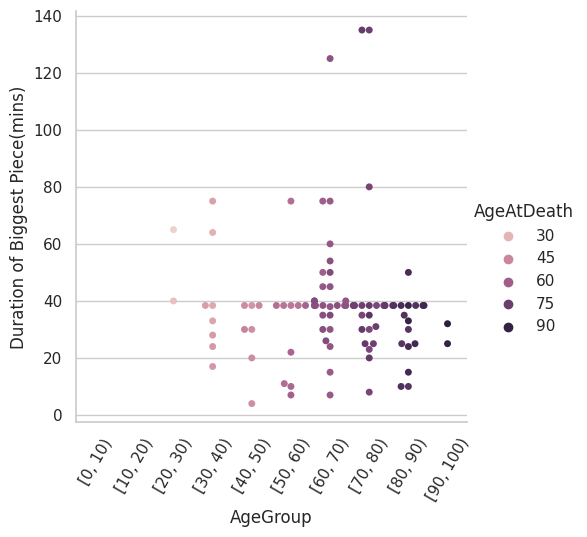

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")

ax =sns.catplot(
    data = viz, 
    x = 'AgeGroup', y='Duration of Biggest Piece(mins)',
    hue='AgeAtDeath',
    kind="swarm",
)
ax.set_xticklabels(rotation=60)

This visualization tells us that across all age groups the average pice is 40 minutes. Composers that are less than forty years of age have pieces that are the average duration or less. It also shows that composers in the ninety and one hundred age group also write compositions that are forty minutes or less. I find it interesting that the longest pieces are written by composers in the sixty to eighty age group. From previous analysis we also know that the top three composers with longest duration are German and Italian, and withi the same previous analysis we know that the shortest pieces of composition are written by English and French composers. 

COMPARITIVE ANALYSIS

Era vs. Composition Lengths

Baroque: 1600–1750

Classical: 1750–1820

Romantic: 1820–1900

Modern: 1900–present

In [29]:
historical_era = subset_sorted[['Composer','Nationality', 'Born', 'Died', 'AgeAtDeath', 'Duration of Biggest Piece(mins)']]
historical_era

df_historical_era = pd.DataFrame(historical_era)
df_historical_era.head()

,Composer,Nationality,Born,Died,AgeAtDeath,Duration of Biggest Piece(mins)
1,Ludwig van Beethoven,German,1770.0,1791.0,21.0,65.0
81,Giovanni Battista Pergolesi,Italian,1710.0,1736.0,26.0,40.0
7,Franz Schubert,Austrian,1797.0,1828.0,31.0,64.0
73,Vincenzo Bellini,Italian,1801.0,1835.0,34.0,38.4
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,35.0,33.0


In [30]:
def categorize_era(row):
    if row['Born'] < 1750:
        return'Baroque'
    elif 1750 <= row['Born'] < 1820:
        return 'Classical'
    elif 1820 <= row['Born'] < 1900:
        return 'Romantic'
    else:
        return 'Modern'
    
        
df_historical_era['Era'] = df_historical_era.apply(categorize_era, axis=1)
df_historical_era.head()

,Composer,Nationality,Born,Died,AgeAtDeath,Duration of Biggest Piece(mins),Era
1,Ludwig van Beethoven,German,1770.0,1791.0,21.0,65.0,Classical
81,Giovanni Battista Pergolesi,Italian,1710.0,1736.0,26.0,40.0,Baroque
7,Franz Schubert,Austrian,1797.0,1828.0,31.0,64.0,Classical
73,Vincenzo Bellini,Italian,1801.0,1835.0,34.0,38.4,Classical
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,35.0,33.0,Classical


In [31]:
agg_data = df_historical_era.groupby('Era')['Duration of Biggest Piece(mins)'].mean().reset_index()

agg_data

,Era,Duration of Biggest Piece(mins)
0,Baroque,47.340000
1,Classical,39.682353
2,Modern,36.142857
3,Romantic,32.186364


In [32]:
# have to convert data when using altair

chart_data = alt.Data(values=agg_data.to_dict('records'))

In [33]:
chart = alt.Chart(chart_data).mark_bar().encode(
    y=alt.Y('Era:N', title='Musical Era', sort='-x'),  # Note the sort is now '-x'
    x=alt.X('mean(Duration of Biggest Piece(mins)):Q', title='Average Length of Longest Composition (mins)'),
    color='Era:N'
).properties(title='Average Length of Longest Compositions by Musical Era')

chart.display()

alt.Chart(...)

Looking at the data from the classical music history(era), we uncover a clear trend: compositions start long and elaborate in the Baroque era, maintain length but gain clarity in the Classical period, then gradually shorten. Romantic pieces dial back on duration, favoring emotion over length. The Modern era continues this trend towards conciseness, blending brevity with innovative twists. This pattern reveals not just shifts in musical preferences but echoes broader cultural transformations over time.

Average Age of Composer at Peak Creativity per Era and Nationality

In [34]:
# New dataframe 

peak_creativity = subset_sorted[['Composer', 'Nationality', 'Born', 'Died', 'Duration of Biggest Piece(mins)', 'AgeAtDeath']].copy()

peak_creativity_df=pd.DataFrame(peak_creativity)
peak_creativity_df.head()

peak_creativity_df['Era'] = peak_creativity_df.apply(categorize_era, axis=1)
peak_creativity_df.head()

,Composer,Nationality,Born,Died,Duration of Biggest Piece(mins),AgeAtDeath,Era
1,Ludwig van Beethoven,German,1770.0,1791.0,65.0,21.0,Classical
81,Giovanni Battista Pergolesi,Italian,1710.0,1736.0,40.0,26.0,Baroque
7,Franz Schubert,Austrian,1797.0,1828.0,64.0,31.0,Classical
73,Vincenzo Bellini,Italian,1801.0,1835.0,38.4,34.0,Classical
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,33.0,35.0,Classical


In [35]:
# What is the average age at death for each era and duration of biggest piece? 

era_age_at_death = peak_creativity_df.groupby('Era')['AgeAtDeath'].mean().reset_index()
era_age_at_death

,Era,AgeAtDeath
0,Baroque,67.333333
1,Classical,53.705882
2,Modern,76.857143
3,Romantic,65.113636


In [36]:
combined_era_peak = pd.merge(agg_data, era_age_at_death, on='Era', how='inner')
combined_era_peak

,Era,Duration of Biggest Piece(mins),AgeAtDeath
0,Baroque,47.340000,67.333333
1,Classical,39.682353,53.705882
2,Modern,36.142857,76.857143
3,Romantic,32.186364,65.113636


In [37]:
nationality_peak = peak_creativity_df.groupby('Nationality')['Duration of Biggest Piece(mins)'].mean().reset_index()
nationality_peak

,Nationality,Duration of Biggest Piece(mins)
0,American,21.000000
1,Austrian,38.260000
2,Belgian,40.000000
3,Czech,48.333333
4,Danish,35.000000
5,English,35.580000
6,Finnish,32.000000
7,Flemish,38.400000
8,Franco-Flemish,75.000000
9,French,31.105882


In [38]:
creative_peak = df_historical_era.groupby(['Nationality', 'Era']).agg({
    'AgeAtDeath': 'mean',
    'Duration of Biggest Piece(mins)': 'mean'
}).reset_index()

In [39]:
# Rename columns for average dataframe

creative_peak.rename(columns={
    'AgeAtDeath': "Average Age at Death",
    'Duration of Biggest Piece(mins)': 'Average Piece(mins)',
    'Era': 'Historical Era'
}, inplace=True)
creative_peak

,Nationality,Historical Era,Average Age at Death,Average Piece(mins)
0,American,Modern,80.333333,19.333333
1,American,Romantic,59.500000,23.500000
2,Austrian,Baroque,77.000000,25.000000
3,Austrian,Classical,33.000000,48.500000
4,Austrian,Romantic,61.285714,37.228571
5,Belgian,Romantic,68.000000,40.000000
6,Czech,Romantic,65.666667,48.333333
7,Danish,Romantic,66.000000,35.000000
8,English,Baroque,61.000000,33.160000
9,English,Modern,72.000000,47.500000


In [40]:
import altair as alt


facet_chart = alt.Chart(creative_peak).mark_bar().encode(
    x='Average Age at Death:Q',
    y='Average Piece(mins):Q',
    color='Nationality:N',
    tooltip=['Nationality', 'Historical Era', 'Average Piece(mins)', 'Average Age at Death']
).properties(
    width=200,
    height=150
).facet(
    column='Historical Era:N'
)

facet_chart.display() 

alt.FacetChart(...)

These patterns reveal cultural undercurrents across eras. The Romantic era's uniformity hints at strong shared values and an emphasis on innovation, individualism, and emotional expression, leading composers to produce similar works despite diverse backgrounds. The Classical era's consistent music style, appealing to a broad age range, indicates its cross-generational resonance. The Baroque era, with its wide range in music and lifespans, showcases a period rich in experimentation and innovation. Meanwhile, the Modern era's concise compositions and uniform lifespans reflect societal shifts towards efficiency and a collective move towards more direct, impactful expression.

MACHING LEARNING WITH CLUSTERING

In [41]:
# use kmeans to cluster the composers into 3 groups based on their age at death and duration of their biggest piece

from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Select the columns to cluster
cluster_data = peak_creativity_df[['Born', 'Duration of Biggest Piece(mins)']].copy()

# Create a pipeline to scale the data and then cluster it 
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)


In [42]:
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to the data
pipeline.fit(cluster_data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [43]:
# Add the cluster labels to the original data
cluster_labels = pipeline.predict(cluster_data)
peak_creativity_df['Cluster'] = cluster_labels
peak_creativity_df.head()

,Composer,Nationality,Born,Died,Duration of Biggest Piece(mins),AgeAtDeath,Era,Cluster
1,Ludwig van Beethoven,German,1770.0,1791.0,65.0,21.0,Classical,1
81,Giovanni Battista Pergolesi,Italian,1710.0,1736.0,40.0,26.0,Baroque,0
7,Franz Schubert,Austrian,1797.0,1828.0,64.0,31.0,Classical,1
73,Vincenzo Bellini,Italian,1801.0,1835.0,38.4,34.0,Classical,0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,33.0,35.0,Classical,0


In [44]:
cluster_mean = cluster_data.groupby(cluster_labels)[['Born', 'Duration of Biggest Piece(mins)']].mean()
cluster_mean

,Born,Duration of Biggest Piece(mins)
0,1831.150685,32.309589
1,1718.300000,90.400000
2,1454.333333,33.426667


In [45]:
cluster_standard_deviation = cluster_data.groupby(cluster_labels)[['Born', 'Duration of Biggest Piece(mins)']].std()
cluster_standard_deviation

,Born,Duration of Biggest Piece(mins)
0,66.304992,11.121203
1,110.230113,29.010343
2,186.557409,11.022799


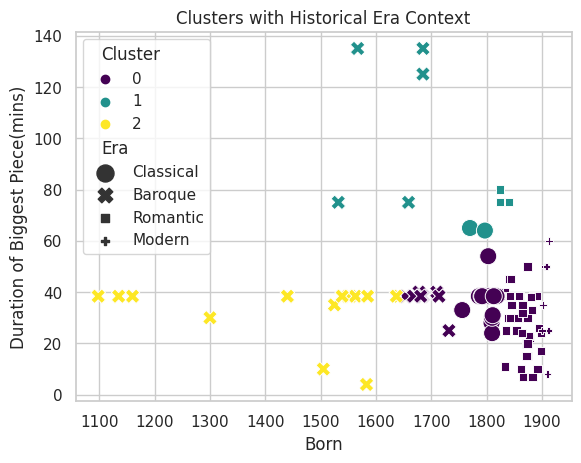

In [46]:
# Visualize the clusters
sns.scatterplot(data=peak_creativity_df, x='Born', y='Duration of Biggest Piece(mins)', hue='Cluster', size='Era', sizes=(30,150), style='Era', palette='viridis')
plt.title('Clusters with Historical Era Context')
plt.show()

Clustering with k-means algorithm brought an interesting pattern to life that the rest of the analysis has not touched upon. The Baroque era is the only era that spans across all three clusters. Classical, Romantic, and Modern composers are clumped together with strong standard deviation and mean, indicating not only a clear relationship between the data and our analysis but also a strong correlation between the era, length of the compositions and a homogenity of lifespan for the composers.

Why would the Baroque era be evaluated in each cluster? 
It suggests that the Baroque era, with its rich array of musical styles and forms, acts as a bridge connecting the characteristics of earlier and later periods of classical music.

FINAL ADVANCED ANALYSIS

Influence of Nationality on Career Lenths

Do composers from certain countries have longer careers than others?

In [47]:
# Rerun peak_creativity_df without the cluster column and new name
influence = subset_sorted[['Composer', 'Nationality', 'Born', 'Died', 'Duration of Biggest Piece(mins)']].copy()

influence_df=pd.DataFrame(influence)
influence_df.head()

influence_df['Era'] = influence_df.apply(categorize_era, axis=1)
influence_df.head()

,Composer,Nationality,Born,Died,Duration of Biggest Piece(mins),Era
1,Ludwig van Beethoven,German,1770.0,1791.0,65.0,Classical
81,Giovanni Battista Pergolesi,Italian,1710.0,1736.0,40.0,Baroque
7,Franz Schubert,Austrian,1797.0,1828.0,64.0,Classical
73,Vincenzo Bellini,Italian,1801.0,1835.0,38.4,Classical
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,33.0,Classical


In [48]:
influence_df['CareerLength'] = influence_df['Died'] - influence_df['Born']
influence_df.head()

,Composer,Nationality,Born,Died,Duration of Biggest Piece(mins),Era,CareerLength
1,Ludwig van Beethoven,German,1770.0,1791.0,65.0,Classical,21.0
81,Giovanni Battista Pergolesi,Italian,1710.0,1736.0,40.0,Baroque,26.0
7,Franz Schubert,Austrian,1797.0,1828.0,64.0,Classical,31.0
73,Vincenzo Bellini,Italian,1801.0,1835.0,38.4,Classical,34.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,33.0,Classical,35.0


In [49]:
nationality_career_lengths = influence_df.groupby('Nationality')['CareerLength'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
nationality_career_lengths

,Nationality,mean,median,std,min,max
0,American,72.000000,80.0,19.634154,39.0,90.0
1,Austrian,57.200000,56.5,17.573971,31.0,77.0
2,Belgian,68.000000,68.0,NaN,68.0,68.0
3,Czech,65.666667,63.0,7.371115,60.0,74.0
4,Danish,66.000000,66.0,NaN,66.0,66.0
5,English,66.200000,65.0,17.242067,36.0,86.0
6,Finnish,92.000000,92.0,NaN,92.0,92.0
7,Flemish,81.000000,81.0,NaN,81.0,81.0
8,Franco-Flemish,62.000000,62.0,NaN,62.0,62.0
9,French,69.176471,66.0,12.430986,37.0,86.0


In [50]:

df_nationality_career_lengths = pd.DataFrame(nationality_career_lengths)
print(df_nationality_career_lengths)

       Nationality       mean  median        std   min   max
0         American  72.000000    80.0  19.634154  39.0  90.0
1         Austrian  57.200000    56.5  17.573971  31.0  77.0
2          Belgian  68.000000    68.0        NaN  68.0  68.0
3            Czech  65.666667    63.0   7.371115  60.0  74.0
4           Danish  66.000000    66.0        NaN  66.0  66.0
5          English  66.200000    65.0  17.242067  36.0  86.0
6          Finnish  92.000000    92.0        NaN  92.0  92.0
7          Flemish  81.000000    81.0        NaN  81.0  81.0
8   Franco-Flemish  62.000000    62.0        NaN  62.0  62.0
9           French  69.176471    66.0  12.430986  37.0  86.0
10       German     65.588235    70.0  18.668352  21.0  87.0
11       Hungarian  69.500000    69.5   7.778175  64.0  75.0
12         Italian  60.071429    61.5  16.909098  26.0  88.0
13       Norweigen  64.000000    64.0        NaN  64.0  64.0
14          Polish  39.000000    39.0        NaN  39.0  39.0
15         Russian  60.9

In [51]:
nationality_career_filtered = df_nationality_career_lengths.dropna(subset=['std'])
nationality_career_filtered

,Nationality,mean,median,std,min,max
0,American,72.000000,80.0,19.634154,39.0,90.0
1,Austrian,57.200000,56.5,17.573971,31.0,77.0
3,Czech,65.666667,63.0,7.371115,60.0,74.0
5,English,66.200000,65.0,17.242067,36.0,86.0
9,French,69.176471,66.0,12.430986,37.0,86.0
10,German,65.588235,70.0,18.668352,21.0,87.0
11,Hungarian,69.500000,69.5,7.778175,64.0,75.0
12,Italian,60.071429,61.5,16.909098,26.0,88.0
15,Russian,60.909091,62.0,13.787346,42.0,89.0
16,Spanish,66.000000,66.0,5.656854,62.0,70.0


In [52]:
data = {
    'Nationality': ['American', 'Austrian', 'Czech', 'English', 'French', 'German', 'Hungarian', 'Italian', 'Russian', 'Spanish'],
    'mean': [72.0, 57.2, 65.666667, 66.2, 69.176471, 65.588235, 69.5, 60.071429, 60.909091, 66.0],
    'std': [19.634154, 17.573971, 7.371115, 17.242067, 12.430986, 18.668352, 7.778175, 16.909098, 13.787346, 5.656854],
    'median': [80.0, 56.5, 63.0, 65.0, 66.0, 70.0, 69.5, 61.5, 62.0, 66.0],
    'min': [39.0, 31.0, 60.0, 36.0, 37.0, 21.0, 64.0, 26.0, 42.0, 62.0],
    'max': [90.0, 77.0, 74.0, 86.0, 86.0, 87.0, 75.0, 88.0, 89.0, 70.0]
}
df = pd.DataFrame(data)

colors = px.colors.qualitative.Plotly 

colors += px.colors.qualitative.Alphabet 

color_map = {nat: colors[i] for i, nat in enumerate(df['Nationality'])}


fig = go.Figure()


fig.add_trace(go.Bar(
    x=df['Nationality'], 
    y=df['mean'], 
    name='Mean Career Length',
    marker_color=[color_map[nat] for nat in df['Nationality']],
    error_y=dict(
        type='data',
        array=df['std'],
        visible=True,
        color='black'),
    opacity=0.7
))


fig.add_trace(go.Scatter(
    x=df['Nationality'], 
    y=df['median'], 
    mode='markers', 
    name='Median',
    marker=dict(color=[color_map[nat] for nat in df['Nationality']], size=10)
    ))

fig.add_trace(go.Scatter(
    x=df['Nationality'], 
    y=df['min'], 
    mode='markers', 
    name='Min',
    marker=dict(color='rgba(135, 206, 250, 0.8)', size=10),
    ))

fig.add_trace(go.Scatter(
    x=df['Nationality'], 
    y=df['max'], 
    mode='markers', 
    name='Max',
    marker=dict(color='rgba(255, 165, 0, 0.8)', size=10)))


fig.update_layout(
    title='Career Length Statistics by Nationality',
    xaxis_title='Nationality',
    yaxis_title='Career Length (years)',
    template='plotly_white')

fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)', 
    'paper_bgcolor': 'rgba(0,0,0,0)', 
    'title_font': {'size': 24},
    'font_family': "Arial, sans-serif",  
    'font_color': "black",
    'xaxis_title': "Nationality",
    'yaxis_title': "Career Length (years)",
    'xaxis': {'tickangle': 45, 'title_standoff': 25},
})

fig.show()

The standard devition for the career lengths among the composers of different nationalities has minimal variance for many, but not all. 40% of the data exhibits nationalites with diverse career lengths. However, the uniformity of 60% of the data gives us several insights. The small variation in the career lengths as indicated by the 'std' values suggests a consistency in the condtions that may have influenced the composers career length regardless of their nationality. In other words, there may be universal factors that influnced a chosen career as a composer, that is beyond cultural or geographical differences. 

The uniformity of career lengths might indicate that facts such as historical events, economic conditions, education, and resources, as well as the classical music community may have standarized the external effects on a composer's career. This could also suggest that this trend is reflected in the cultural and systemic support for composers in various countries, which suggests that classical music tradtion has a robust system in place worldwide and nurtures and sustains composer's careers. 